In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

print("Dataset loaded successfully!")
print("Shape:", df.shape)
df.head()


Dataset loaded successfully!
Shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
# Basic exploration
df.info()
print("\nMissing values per column:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Missing values per column:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarke

In [3]:
#Dayta Cleaning & Preprocessing

import numpy as np

# 1️⃣ Fill missing Embarked values with the most common (mode)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)

# 2️⃣ Fill missing Fare values with median (safer than mean)
df['Fare'].fillna(df['Fare'].median(), inplace=True)

# 3️⃣ Handle missing Age values — fill with median
df['Age'].fillna(df['Age'].median(), inplace=True)

# 4️⃣ Create a new column 'Deck' extracted from 'Cabin'
df['Deck'] = df['Cabin'].astype(str).str[0].replace('n', np.nan)

# 5️⃣ Create FamilySize (siblings/spouse + parents/children + self)
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

# 6️⃣ Create IsAlone — 1 if alone, 0 otherwise
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)

# 7️⃣ Create AgeGroup and FareGroup (bins)
df['AgeGroup'] = pd.cut(df['Age'], bins=[0, 12, 20, 40, 60, 120],
                        labels=['Child', 'Teen', 'Adult', 'Mature', 'Senior'])
df['FareGroup'] = pd.qcut(df['Fare'], 4, labels=['Low', 'Mid', 'High', 'Very High'])

# 8️⃣ Drop columns not useful for analysis (optional)
df.drop(columns=['Cabin', 'Ticket'], inplace=True)

print("Cleaning and ft engineering done!")
df.head()


Cleaning and ft engineering done!


/tmp/ipython-input-199813518.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)
/tmp/ipython-input-199813518.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=Tru

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,Deck,FamilySize,IsAlone,AgeGroup,FareGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,NaN,2,0,Adult,Low
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,C,2,0,Adult,Very High
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,NaN,1,1,Adult,Mid
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,C,2,0,Adult,Very High
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,NaN,1,1,Adult,Mid


In [4]:
df.info()
print("\nMissing values after cleaning:")
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          891 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Fare         891 non-null    float64 
 9   Embarked     891 non-null    object  
 10  Deck         204 non-null    object  
 11  FamilySize   891 non-null    int64   
 12  IsAlone      891 non-null    int64   
 13  AgeGroup     891 non-null    category
 14  FareGroup    891 non-null    category
dtypes: category(2), float64(2), int64(7), object(4)
memory usage: 92.8+ KB

Missing values after cleaning:
PassengerId      0
Survived         0
Pclass           0

Overall Survival Rate: 38.38%


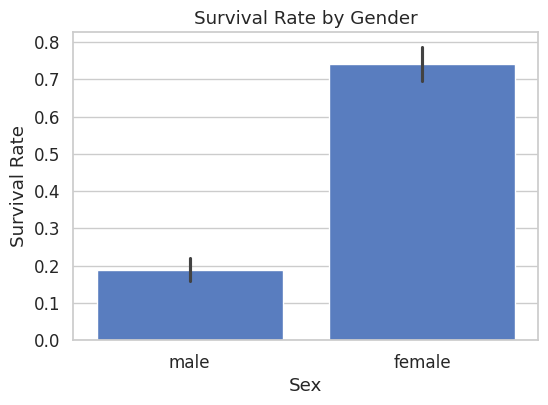

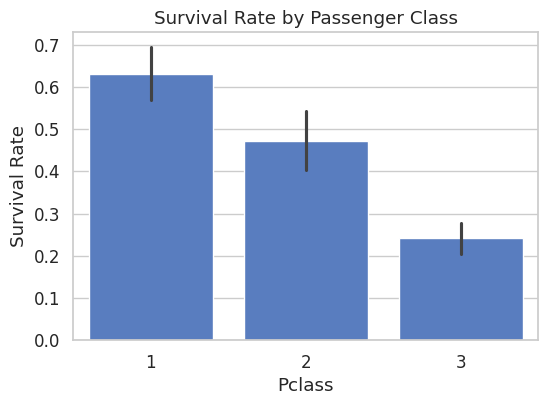

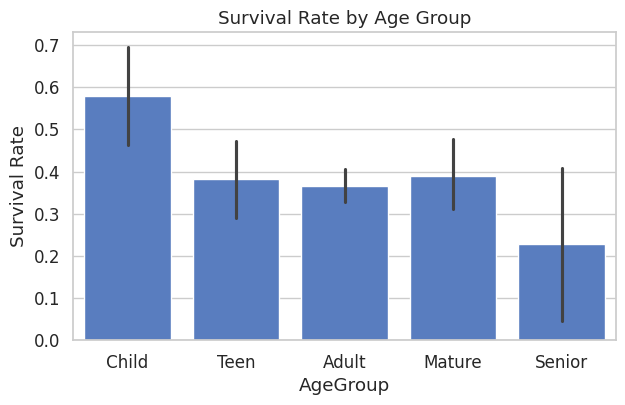

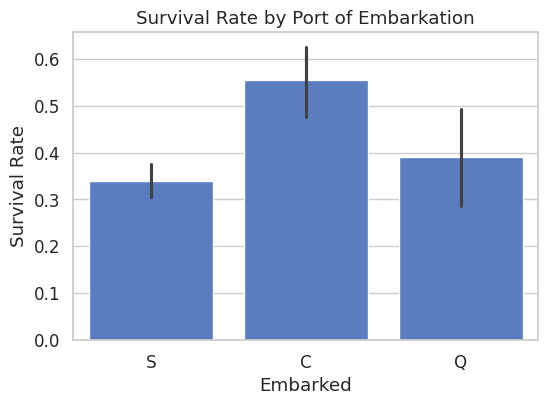

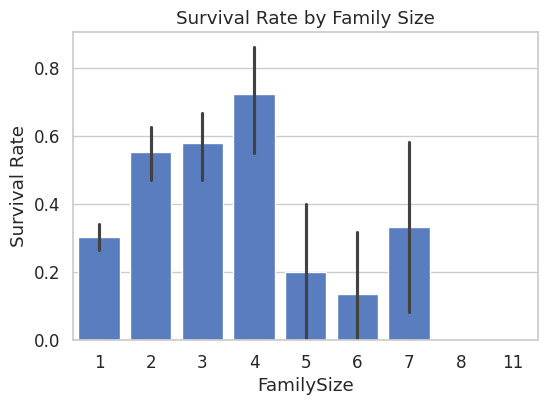

In [5]:
# Step 6: Descriptive analysis and visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Make charts look nice
sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1️ Overall survival rate
overall_survival = df['Survived'].mean() * 100
print(f"Overall Survival Rate: {overall_survival:.2f}%")

# 2️ Survival by Gender
plt.figure(figsize=(6,4))
sns.barplot(x='Sex', y='Survived', data=df)
plt.title('Survival Rate by Gender')
plt.ylabel('Survival Rate')
plt.show()

# 3️ Survival by Passenger Class
plt.figure(figsize=(6,4))
sns.barplot(x='Pclass', y='Survived', data=df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

# 4️ Survival by Age Group
plt.figure(figsize=(7,4))
sns.barplot(x='AgeGroup', y='Survived', data=df, order=['Child','Teen','Adult','Mature','Senior'])
plt.title('Survival Rate by Age Group')
plt.ylabel('Survival Rate')
plt.show()

# 5️ Survival by Embarked Port
plt.figure(figsize=(6,4))
sns.barplot(x='Embarked', y='Survived', data=df)
plt.title('Survival Rate by Port of Embarkation')
plt.ylabel('Survival Rate')
plt.show()

# 6️ Survival by Family Size
plt.figure(figsize=(6,4))
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title('Survival Rate by Family Size')
plt.ylabel('Survival Rate')
plt.show()



In [6]:

print("\nSurvival rate by gender:")
print(df.groupby('Sex')['Survived'].mean() * 100)

print("\nSurvival rate by class:")
print(df.groupby('Pclass')['Survived'].mean() * 100)

print("\nSurvival rate by AgeGroup:")
print(df.groupby('AgeGroup')['Survived'].mean() * 100)



Survival rate by gender:
Sex
female    74.203822
male      18.890815
Name: Survived, dtype: float64

Survival rate by class:
Pclass
1    62.962963
2    47.282609
3    24.236253
Name: Survived, dtype: float64

Survival rate by AgeGroup:
AgeGroup
Child     57.971014
Teen      38.181818
Adult     36.476868
Mature    39.062500
Senior    22.727273
Name: Survived, dtype: float64


/tmp/ipython-input-996570137.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  print(df.groupby('AgeGroup')['Survived'].mean() * 100)
